In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import mpmath
import random as rd
from copy import deepcopy

In [0]:
# membaca dataset
df = pd.read_csv('drive/My Drive/ML/used_cars.csv')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# mengambil data yang akan dipakai
df1 = df[['transmission','odometer','year']].copy()

In [0]:
# menspesifikasikan transmisi mobil
df2 = df1.loc[df1['transmission'] == 'automatic']

<Figure size 750x750 with 0 Axes>

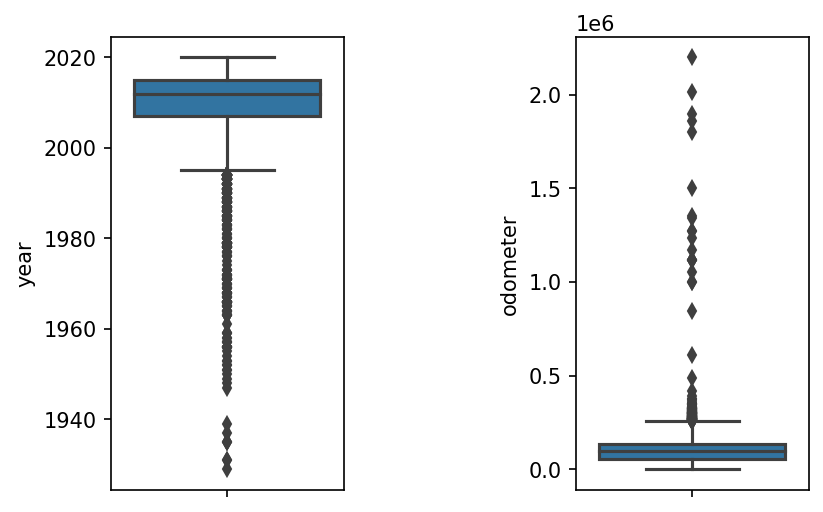

In [9]:
# melihat sebaran outlier sebelum data cleansing
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(5, 5))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df2["year"], ax=axes[0])
sns.boxplot(y=df2["odometer"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [10]:
# data cleansing
df2.dropna(inplace=True)
drop = df2.drop(df2.loc[df2['year'] < 2007].index, inplace=True)
drop = df2.drop(df2.loc[df2['odometer'] > 100000].index, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
# melihat jumlah data yang bernilai Null
df2.isnull().sum()

transmission    0
odometer        0
year            0
dtype: int64

<Figure size 750x750 with 0 Axes>

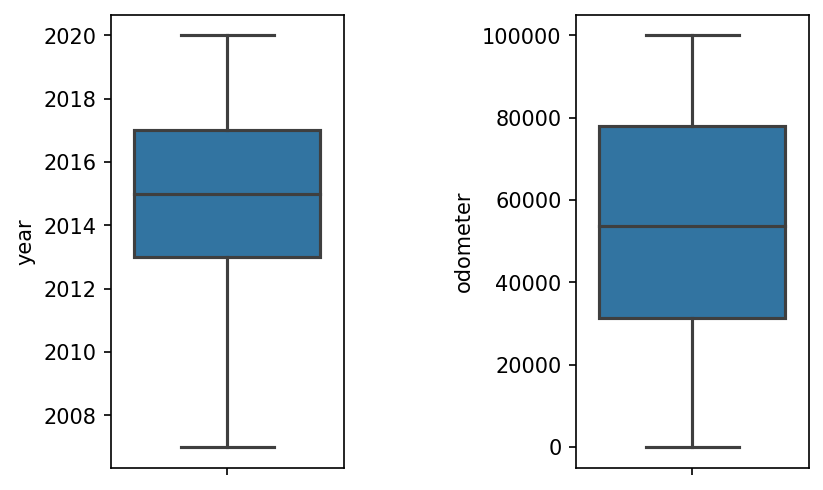

In [12]:
# melihat sebaran outlier sesudah data cleansing
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(5, 5))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df2["year"], ax=axes[0])
sns.boxplot(y=df2["odometer"], ax=axes[1])
plt.subplots_adjust(wspace=1)

In [0]:
# menentukan ukuran dan style plot
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

Text(0, 0.5, 'year')

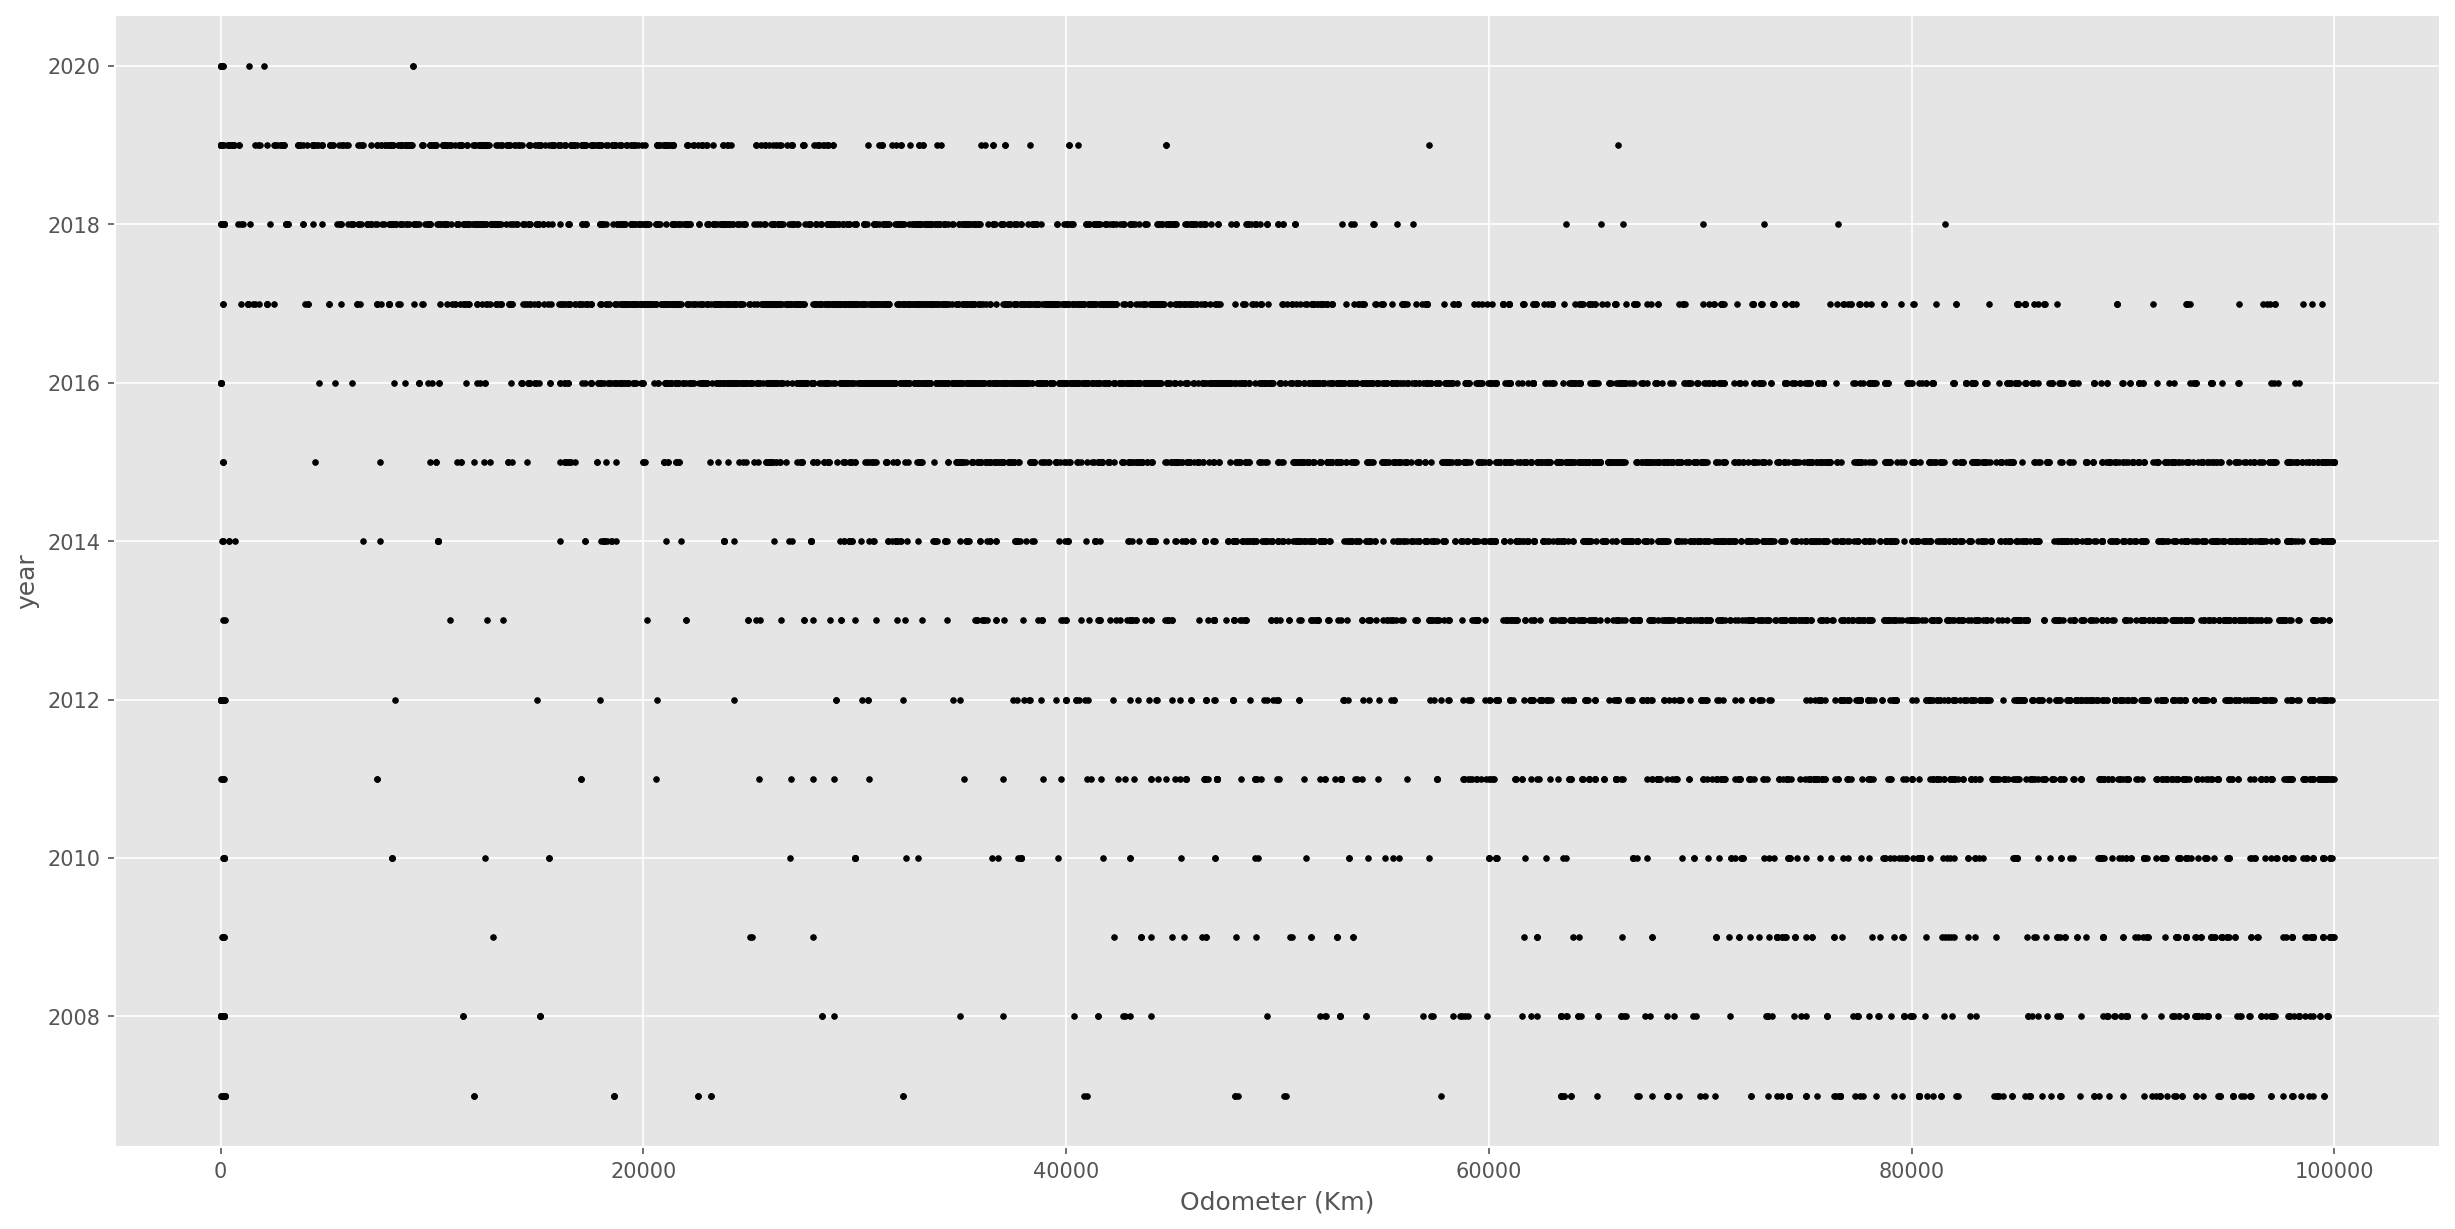

In [14]:
# mengambil value dan plotting data
f1 = df2['odometer'].values
f2 = df2['year'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel('Odometer (Km)')
plt.ylabel('year')

In [0]:
# menghitung Euclidean Distance
def dist(a, b, ax=1):
  return np.linalg.norm(a - b, axis=ax)

In [16]:
# jumlah clusters
k = 3

# koordinat x dari random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)

# koordinat y dari random centroids
C_y = np.random.randint(2007, np.max(2020), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[91641.  2017.]
 [81424.  2010.]
 [ 1536.  2009.]]


Text(0, 0.5, 'Year')

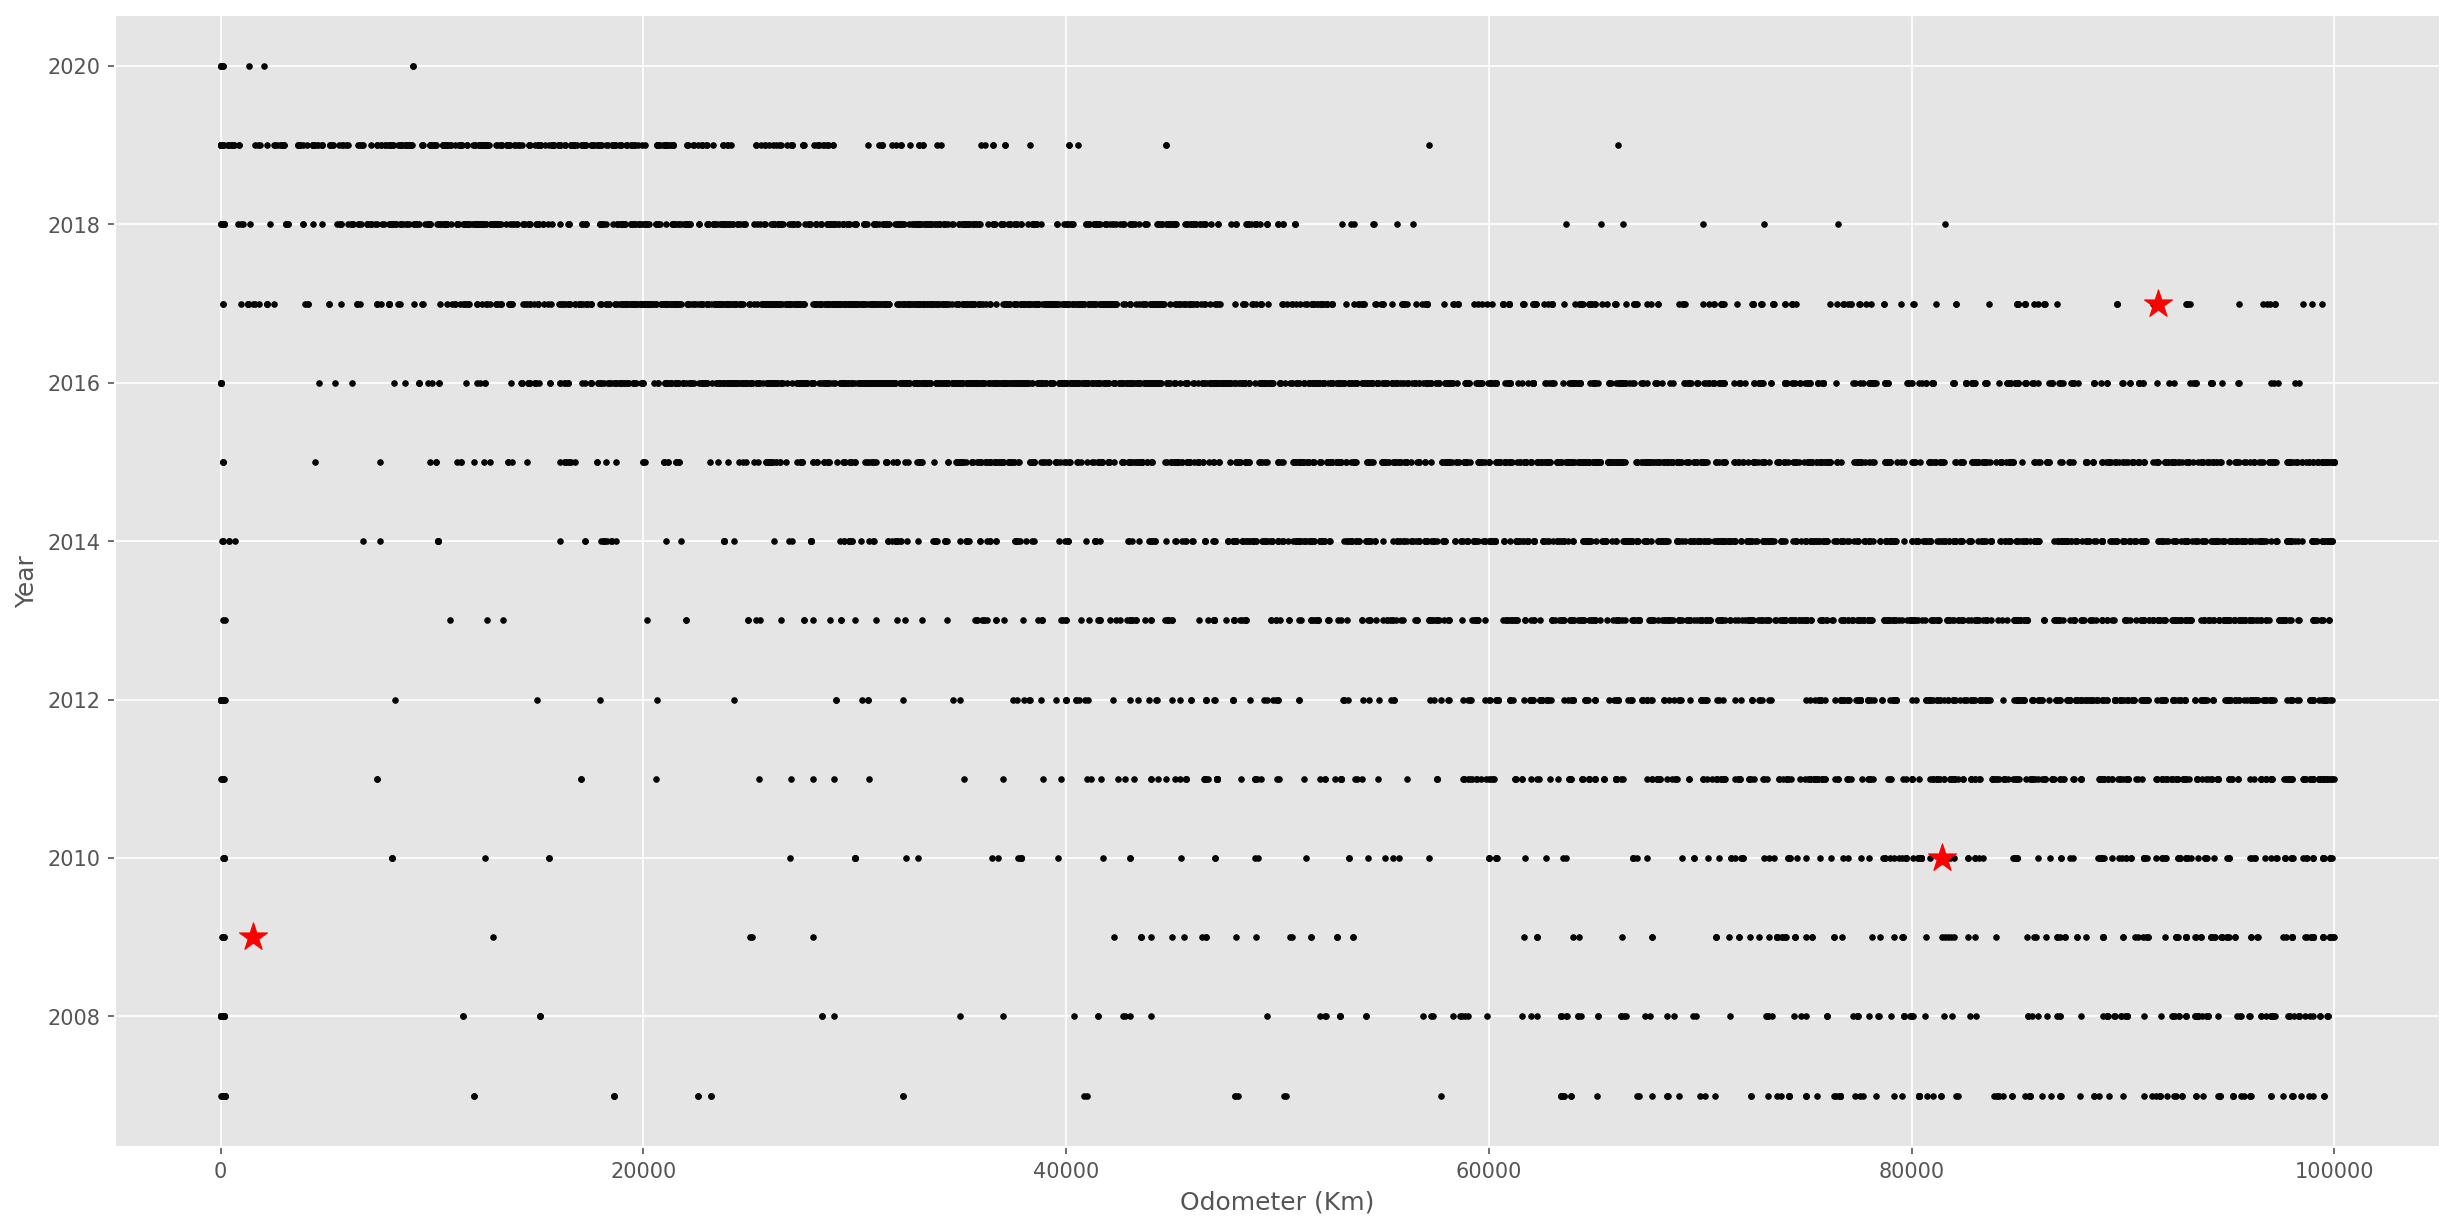

In [17]:
# Plotting bersamaan dengan centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='r')
plt.xlabel('Odometer (Km)')
plt.ylabel('Year')

In [0]:
### Jika proses running tidak berhenti/terus berjalan pada tahap ini, mohon untuk di running ulang. Karena sering terjadi hal seperti itu.

# untuk menyimpan nilai centroids ketika di update
C_old = np.zeros(C.shape)

# label clusters (0, 1)
clusters = np.zeros(len(X))

# jarak antara centroid baru dan centroid lama
error = dist(C, C_old, None)

# looping akan berhenti ketika error = 0
while error != 0:
  
  # assign setiap value dengan cluster terdekatnya
  for i in range(len(X)):
    distances = dist(X[i], C)
    cluster = np.argmin(distances)
    clusters[i] = cluster
  
  # menyimpan nilai centroid yang lama
  C_old = deepcopy(C)
  
  # mencari centroid baru dengan mengambil nilai rata-rata
  for i in range(k):
    points = [X[j] for j in range(len(X)) if clusters[j] == i]
    C[i] = np.mean(points, axis=0)
  error = dist(C, C_old, None)

Text(0, 0.5, 'Year')

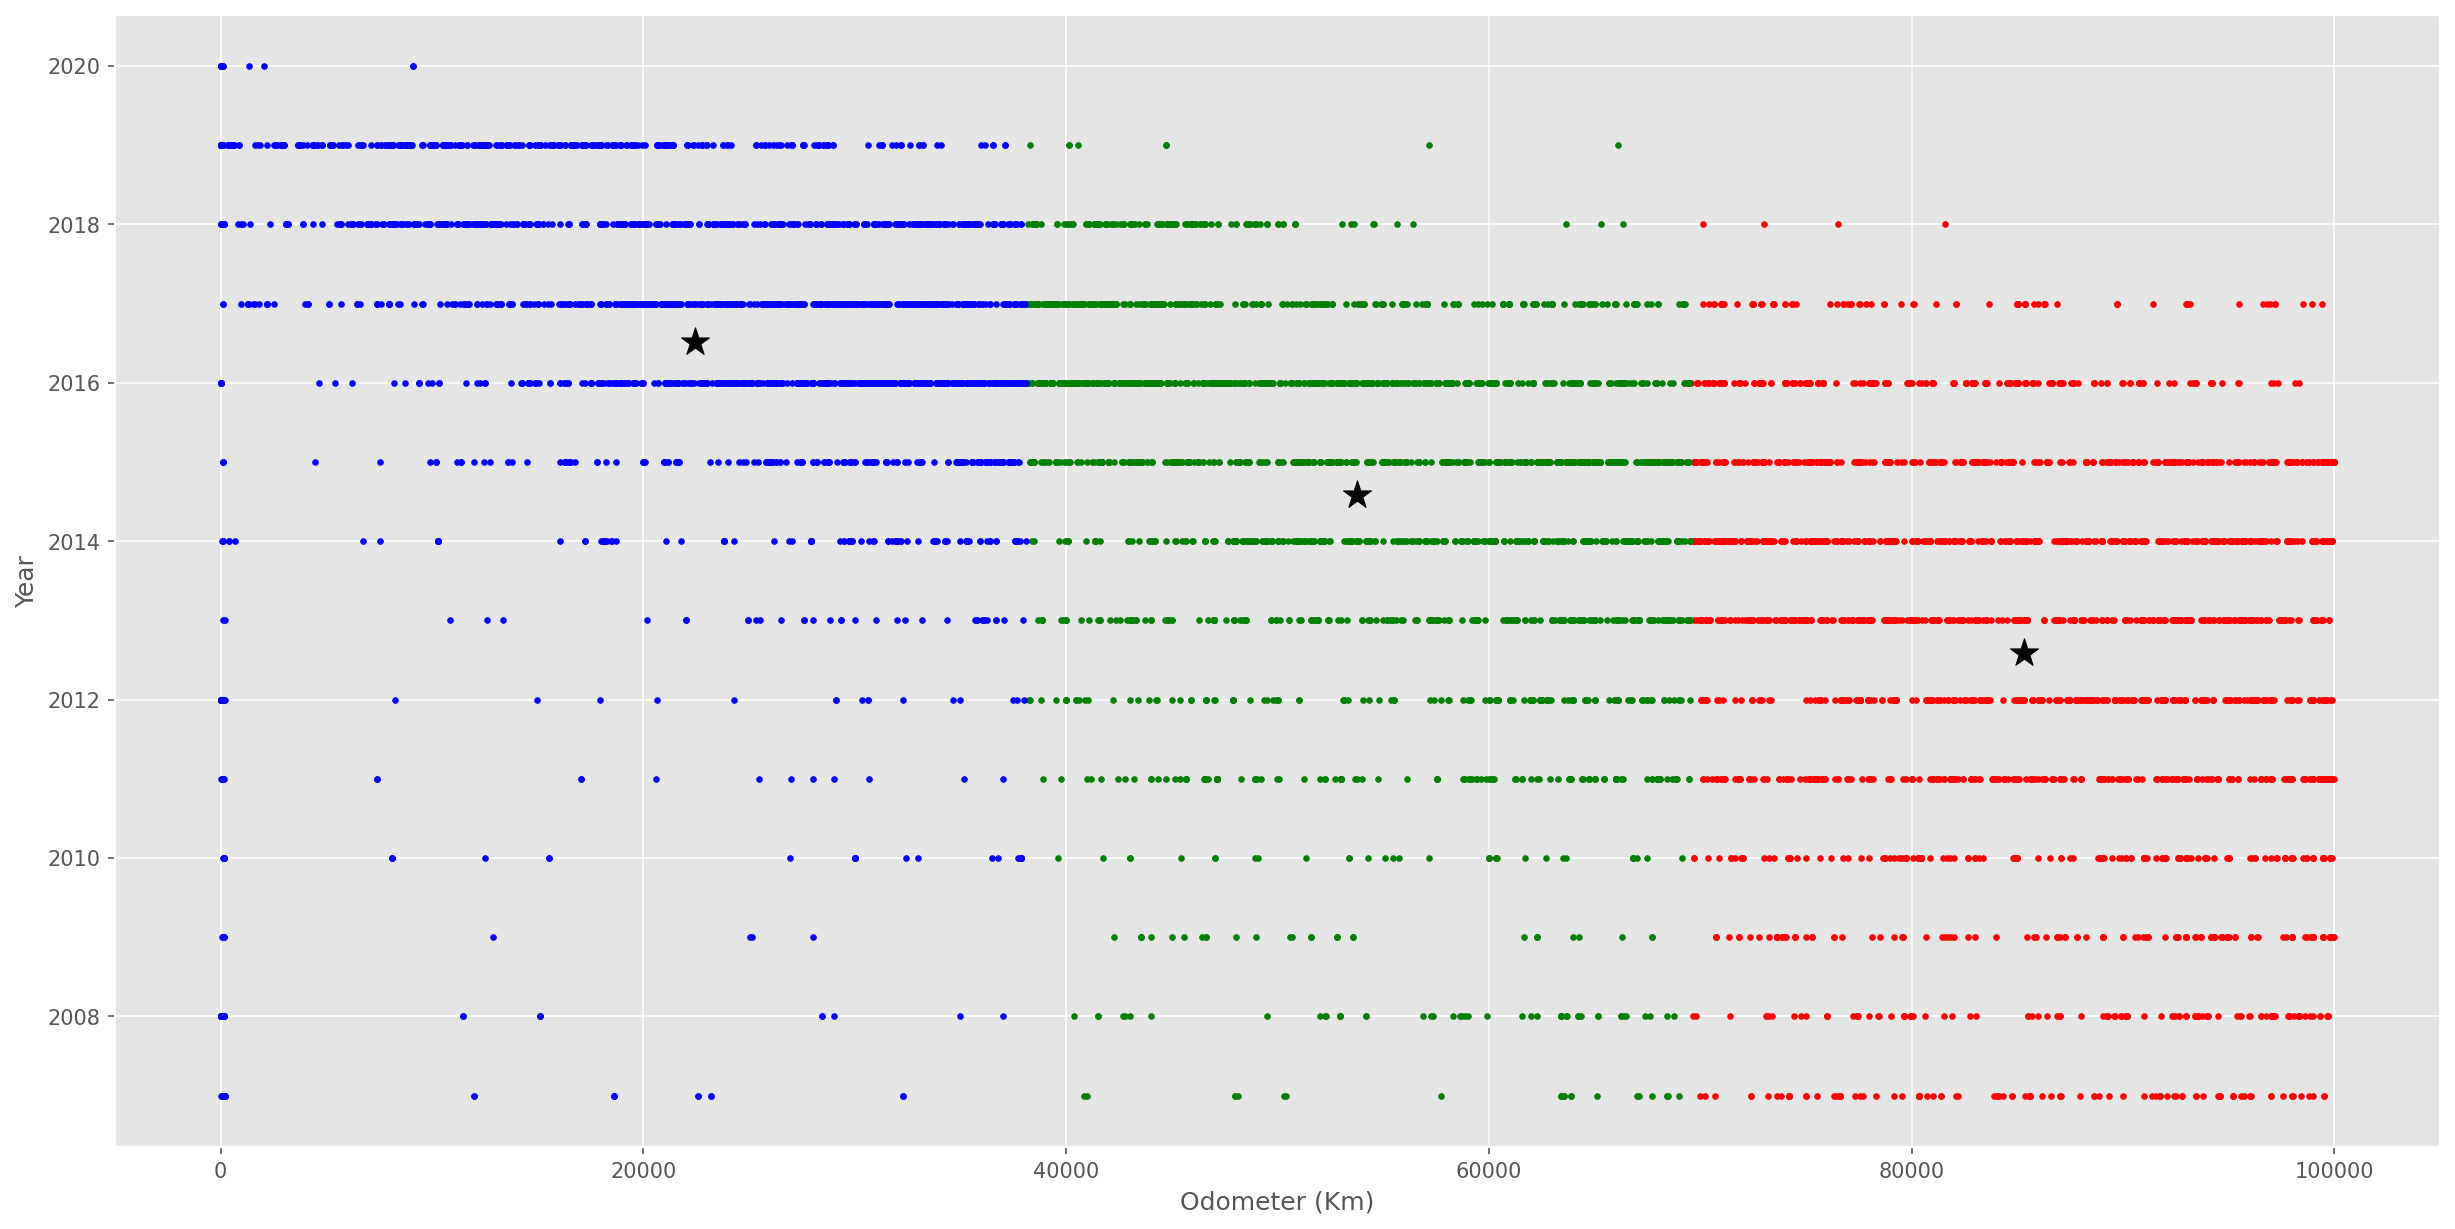

In [19]:
#plotting dengan posisi centroid terbaru
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
  points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
  ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.xlabel('Odometer (Km)')
plt.ylabel('Year')